# ASSIGENMENT NO. 5 ( MULTI LINEAR REGRESSION )

### <font color = red > Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

**R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [7]:
data = pd.read_csv("50_Startups.csv")

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


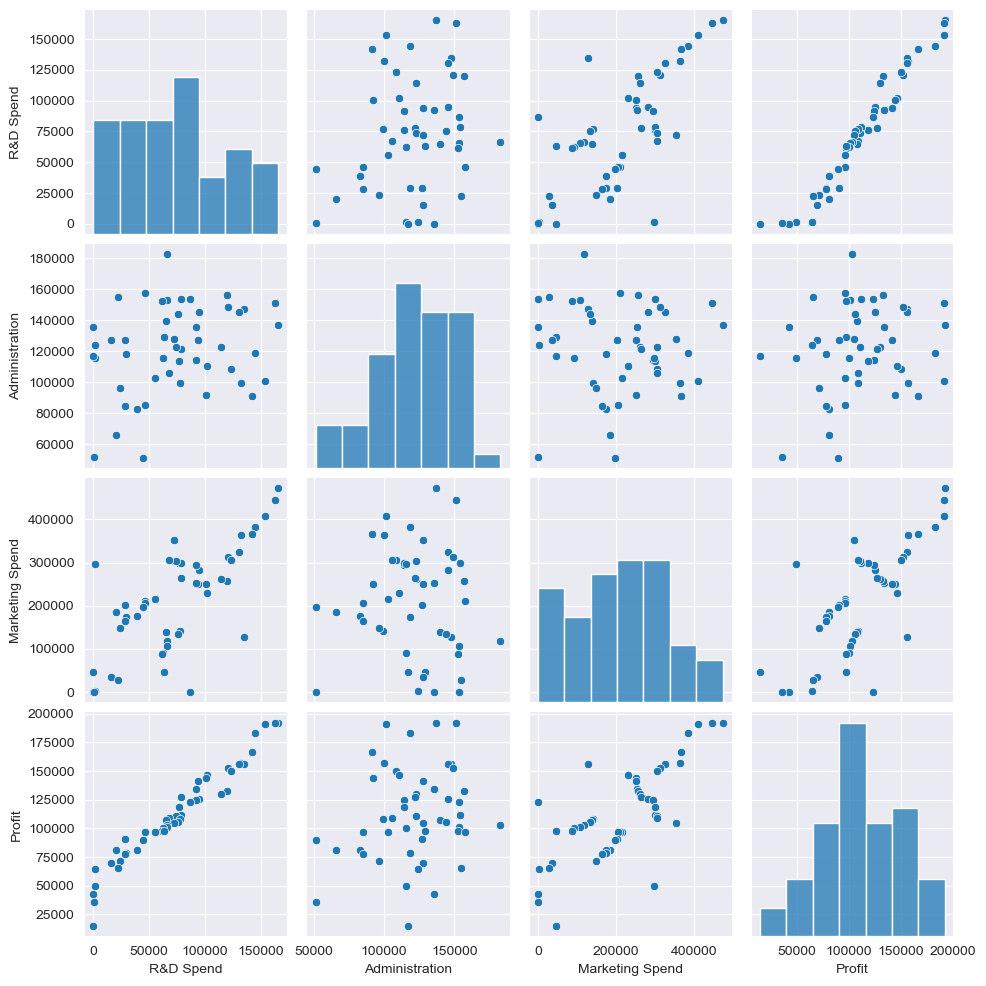

In [13]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [14]:
data.columns=["RandD","Admin","Marketing","State","Profit"]
data.head()

,RandD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RandD +Admin+Marketing', data=data).fit()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RandD      50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
model.params

Intercept    50122.192990
RandD            0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        09:49:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
rsquared_Marketing = smf.ols("Marketing~RandD+Admin",data=data).fit().rsquared
VIF_Marketing = 1/(1-rsquared_Marketing)
rsquared_RandD = smf.ols("RandD~Admin+Marketing",data=data).fit().rsquared
VIF_RandD = 1/(1-rsquared_RandD)
rsquared_Admin = smf.ols("Admin~RandD+Marketing",data=data).fit().rsquared
VIF_Admin = 1/(1-rsquared_Admin)
rsquared_Marketing = smf.ols("Marketing~RandD+Admin",data=data).fit().rsquared
VIF_Marketing = 1/(1-rsquared_Marketing)
VIF = {"Features":["RandD","Admin","Marketing"], "VIF":[VIF_RandD,VIF_Admin,VIF_Marketing]}
VIF_frame = pd.DataFrame(VIF)
VIF_frame

,Features,VIF
0,RandD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


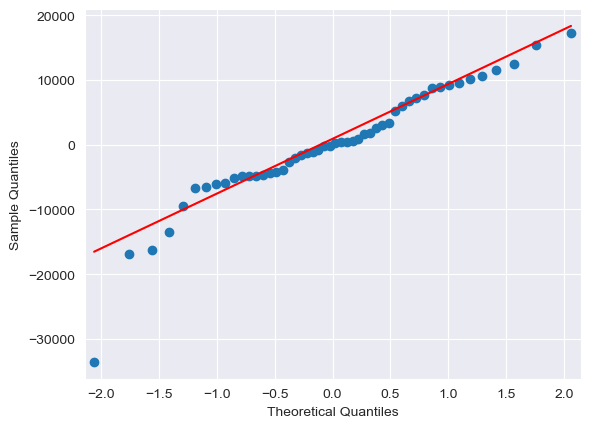

In [20]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line="q")
plt.show()

In [21]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

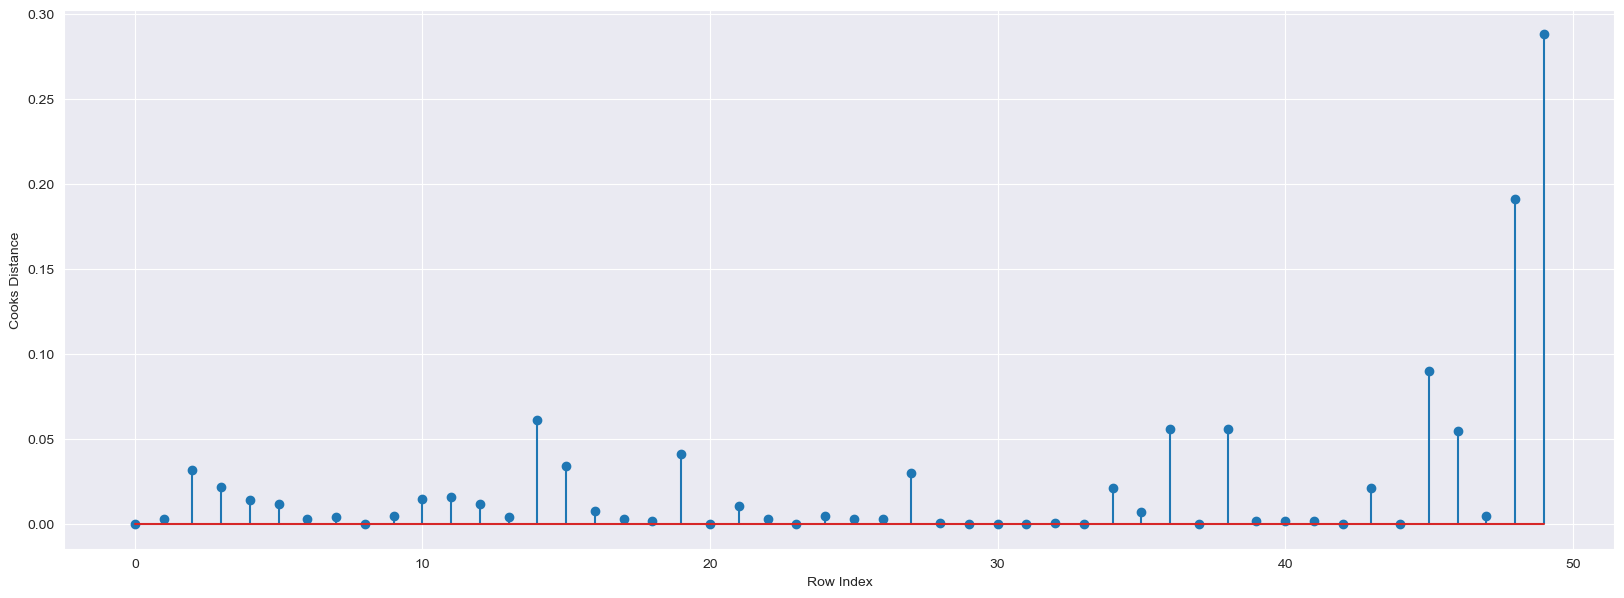

In [22]:
model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [23]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

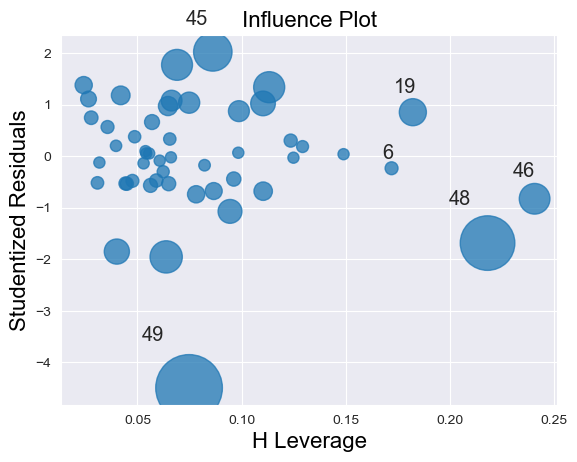

In [24]:
influence_plot(model)
plt.show()

In [25]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [26]:
model.predict(data)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [27]:
data1 = pd.DataFrame({"Predicted Values":np.round(model.predict(data),2) , "Error Value":data.Profit - np.round(model.predict(data),2)})
data2 = pd.concat([data,data1],axis=1)
data2

,RandD,Admin,Marketing,State,Profit,Predicted Values,Error Value
0,165349.20,136897.80,471784.10,New York,192261.83,192521.25,-259.42
1,162597.70,151377.59,443898.53,California,191792.06,189156.77,2635.29
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.28,8903.11
3,144372.41,118671.85,383199.62,New York,182901.99,173696.70,9205.29
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.51,-5951.57
5,131876.90,99814.71,362861.36,New York,156991.12,163580.78,-6589.66
6,134615.46,147198.87,127716.82,California,156122.51,158114.10,-1991.59
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.36,-4268.76
8,120542.52,148718.95,311613.29,New York,152211.77,151741.70,470.07
9,123334.88,108679.17,304981.62,California,149759.96,154884.68,-5124.72


# =======================================================

# <font color = red > toyota corolla 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [33]:
data2 = pd.read_csv("ToyotaCorolla.csv",encoding='latin')

In [30]:
data2.head()

,RandD,Admin,Marketing,State,Profit,Predicted Values,Error Value
0,165349.20,136897.80,471784.10,New York,192261.83,192521.25,-259.42
1,162597.70,151377.59,443898.53,California,191792.06,189156.77,2635.29
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.28,8903.11
3,144372.41,118671.85,383199.62,New York,182901.99,173696.70,9205.29
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.51,-5951.57


In [34]:
data3 = pd.DataFrame({"Price":data2.Price, "Age":data2.Age_08_04, "KM":data2.KM, "HP":data2.HP, "CC":data2.cc, "Doors":data2.Doors, "Gears":data2.Gears, "QuarterlyTax":data2.Quarterly_Tax, "Weight":data2.Weight})
data3

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [35]:
data3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QuarterlyTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [36]:
sns.set_style(style="darkgrid")
sns.pairplot(data3)

In [37]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=data3).fit()

In [38]:
model.params

Intercept      -5573.106358
Age             -121.658402
KM                -0.020817
HP                31.680906
CC                -0.121100
Doors             -1.616641
Gears            594.319936
QuarterlyTax       3.949081
Weight            16.958632
dtype: float64

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:52:15   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
CC              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
rsquared_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_Age = 1/(1-rsquared_Age)

rsquared_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols("HP~Age+KM+CC+Doors+Gears+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_HP = 1/(1-rsquared_HP)

rsquared_CC = smf.ols("CC~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_CC = 1/(1-rsquared_CC)

rsquared_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_Doors = 1/(1-rsquared_Doors)

rsquared_Gears = smf.ols("Gears~Age+KM+HP+CC+Doors+QuarterlyTax+Weight", data=data3).fit().rsquared
VIF_Gears = 1/(1-rsquared_Gears)

rsquared_QuarterlyTax = smf.ols("QuarterlyTax~Age+KM+HP+CC+Doors+Gears+Weight", data=data3).fit().rsquared
VIF_QuarterlyTax = 1/(1-rsquared_QuarterlyTax)

rsquared_Weight = smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QuarterlyTax", data=data3).fit().rsquared
VIF_Weight = 1/(1-rsquared_Weight)

VIF={"Features":["Age","KM","HP","CC","Doors","Gears","QuarterlyTax","Weight"],"VIF_Values":[VIF_Age,VIF_KM,VIF_HP,VIF_CC,VIF_Doors,VIF_Gears,VIF_QuarterlyTax,VIF_Weight]}
VIF_Frame = pd.DataFrame(VIF)
VIF_Frame

,Features,VIF_Values
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QuarterlyTax,2.311431
7,Weight,2.516420


In [41]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line="q")

In [42]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [43]:
model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance

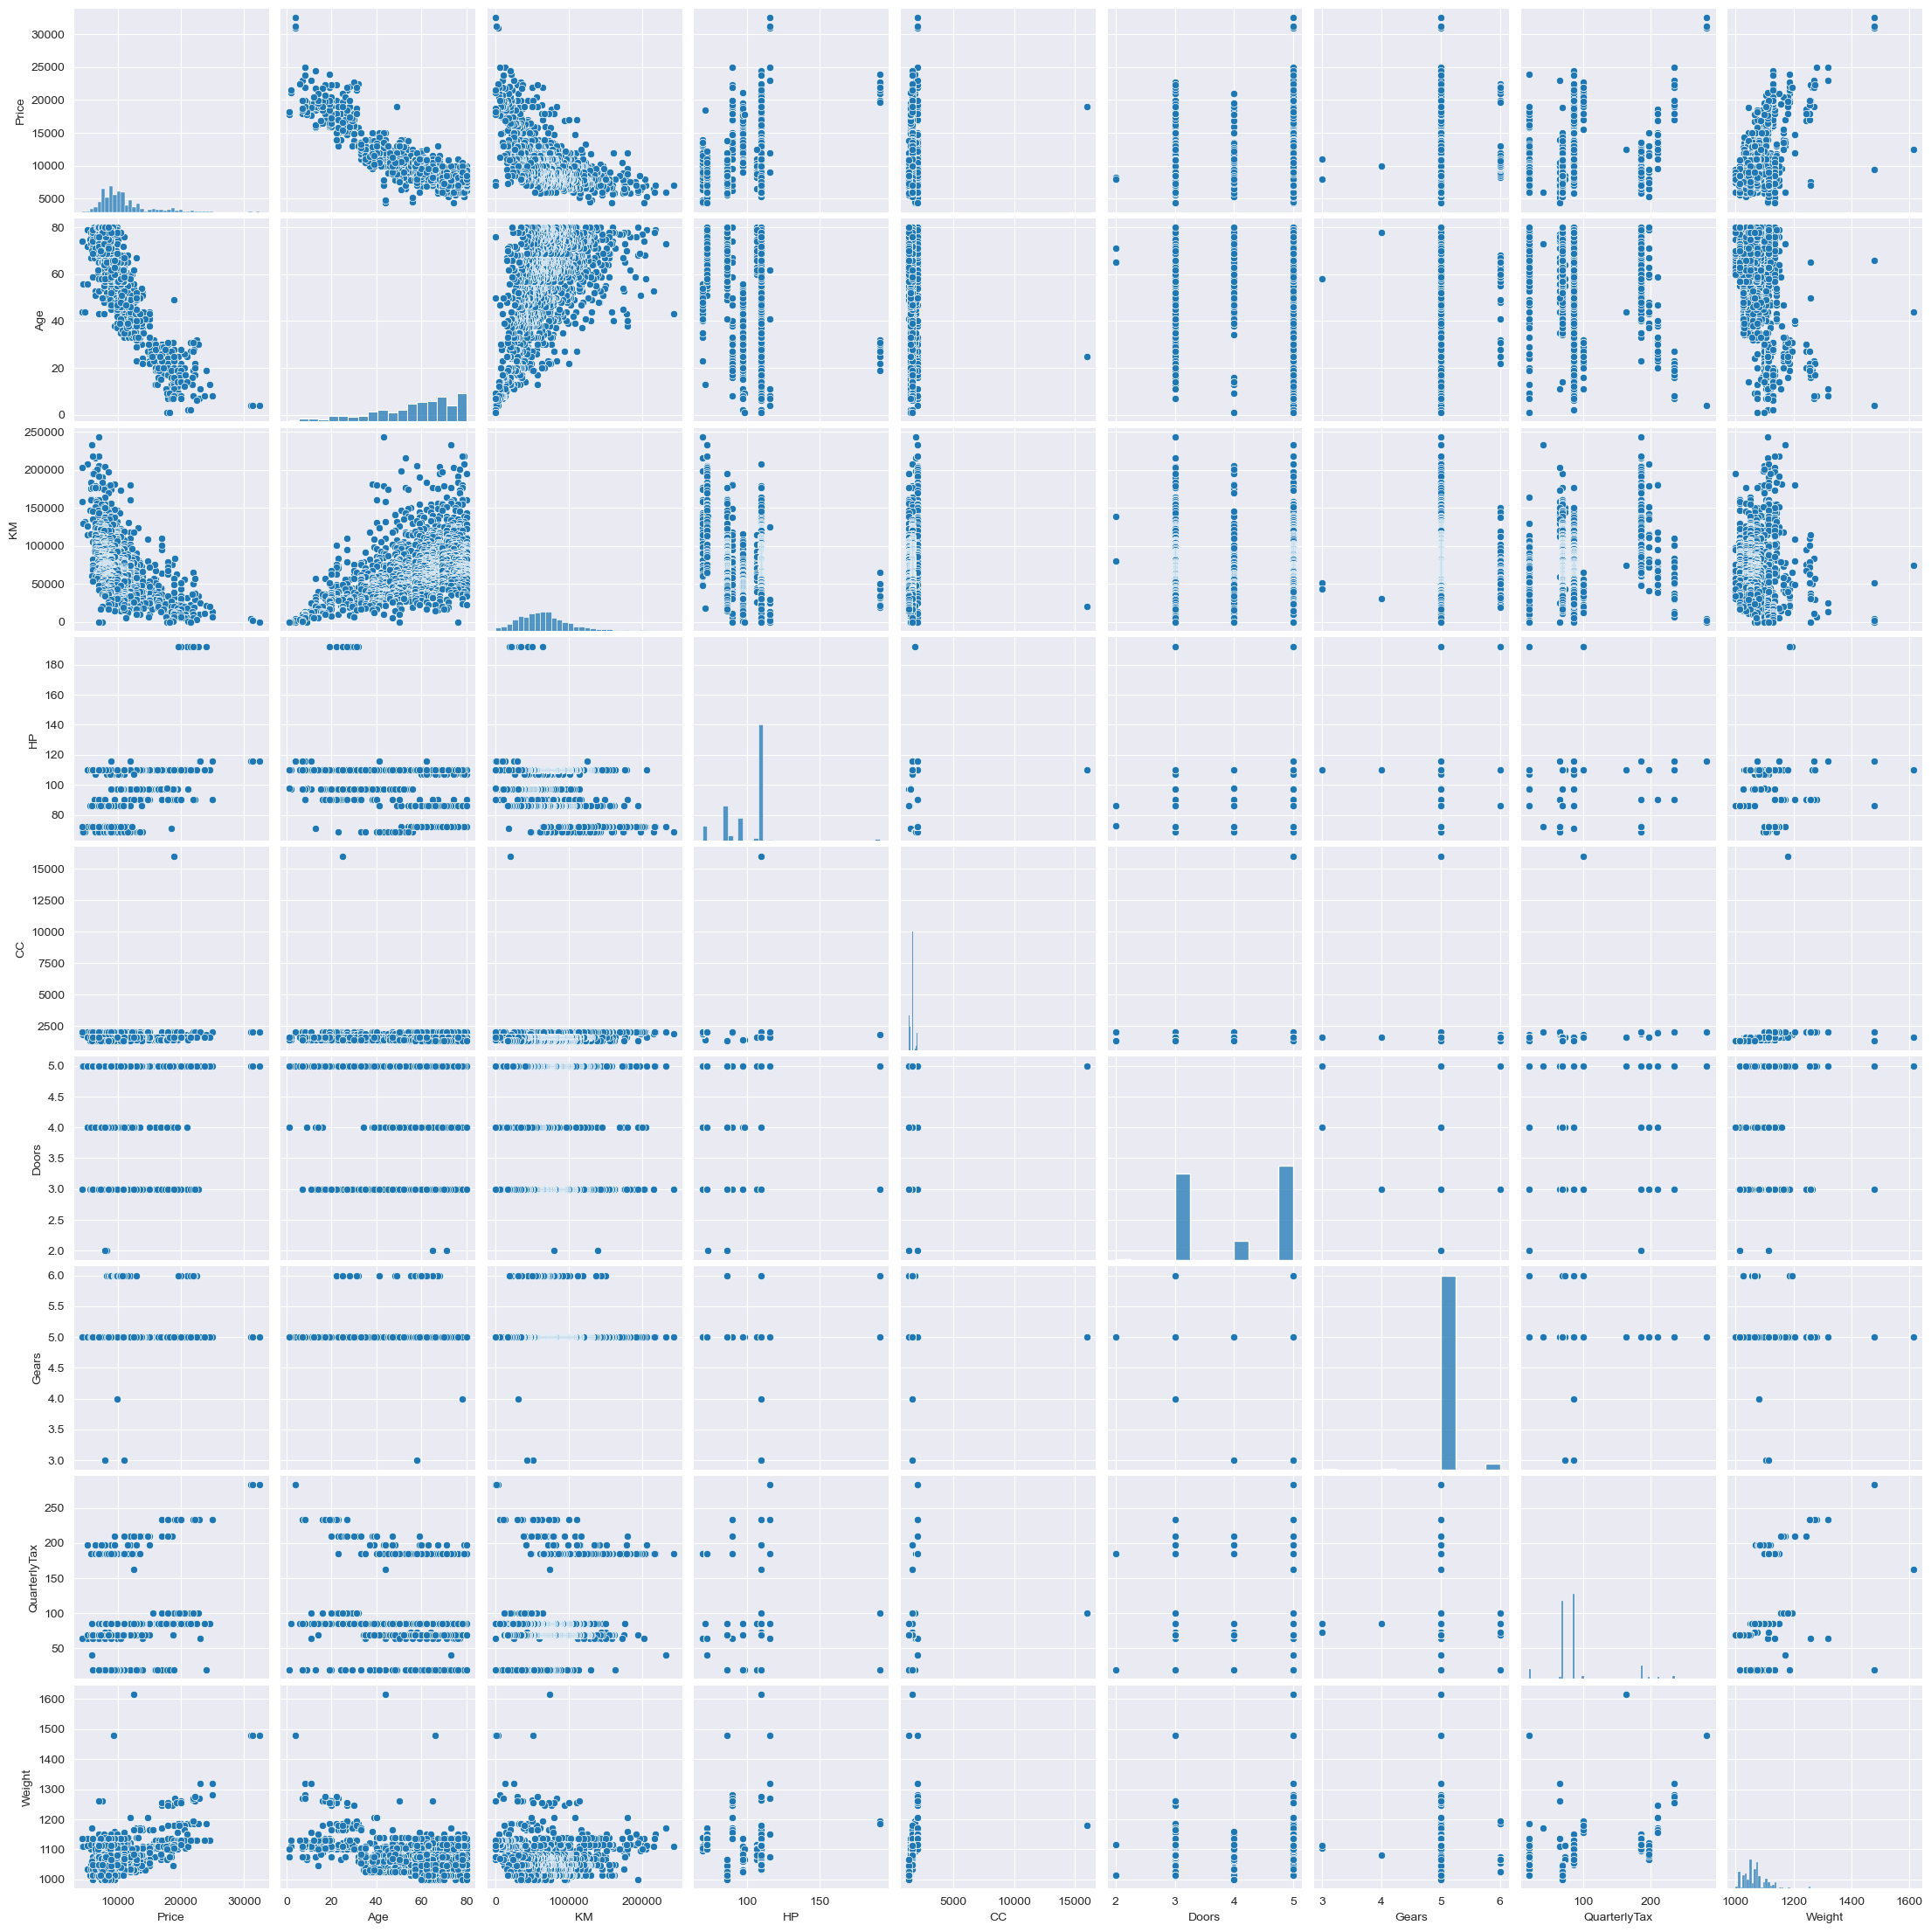

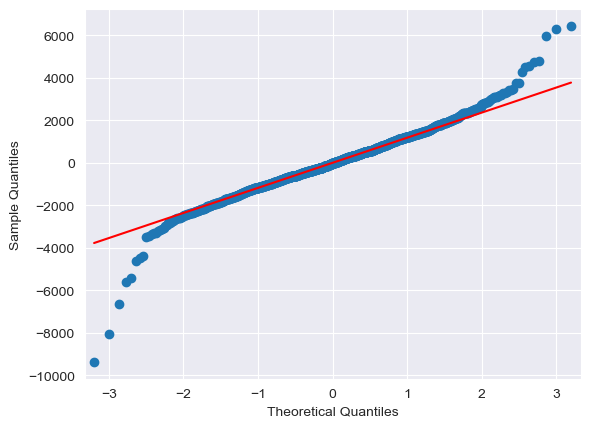

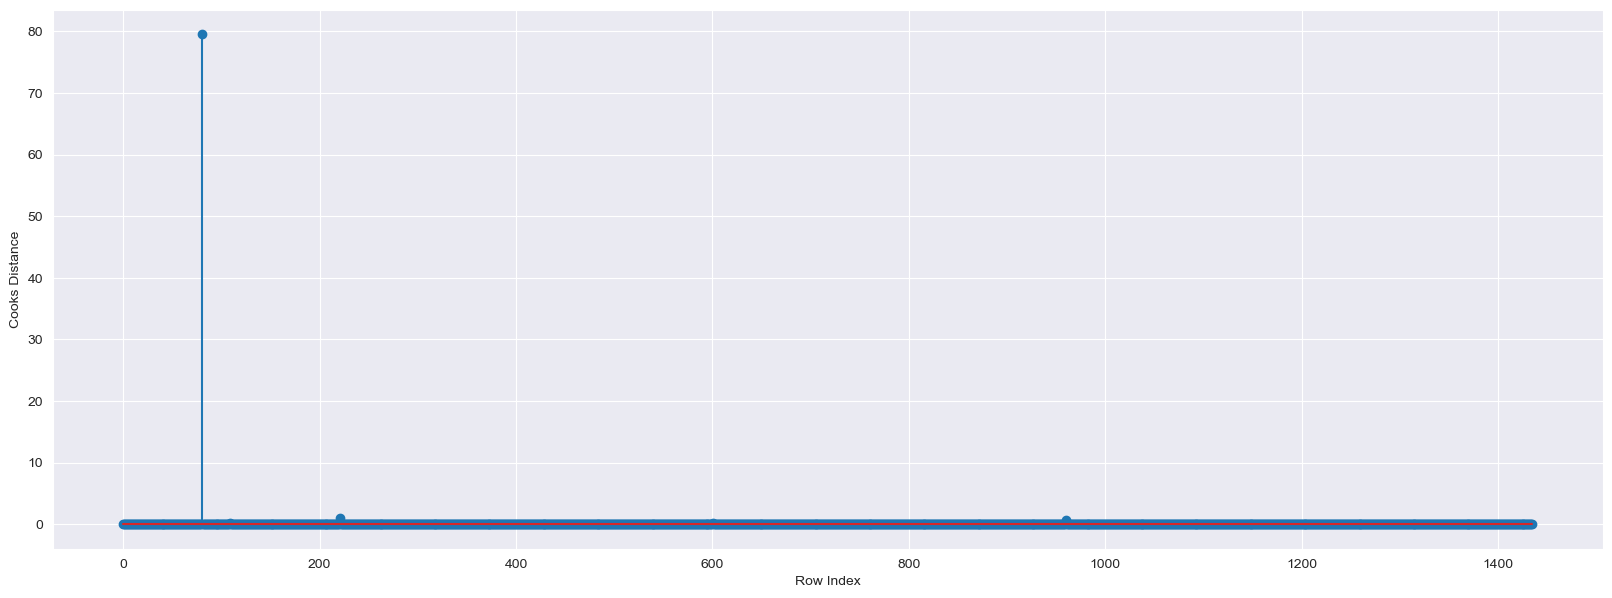

In [44]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [45]:
np.argmax(c),np.max(c)

(80, 79.52010624138181)

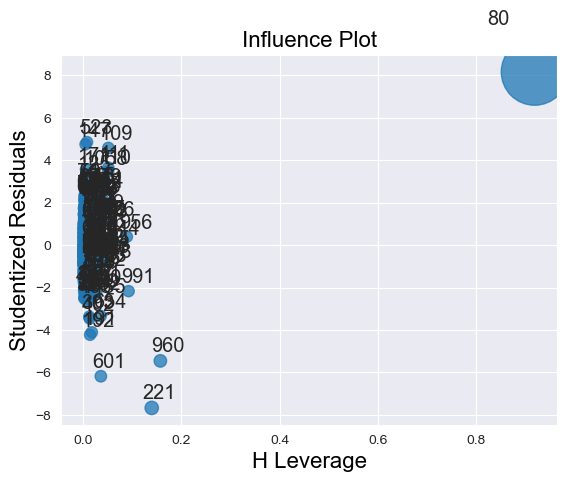

In [46]:
influence_plot(model)
plt.show()

In [47]:
k=data3.shape[1]
n=data3.shape[0]
levearge_cutoff = (3*(k+1))/n
levearge_cutoff

0.020891364902506964

In [48]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [49]:
data3=data3.drop(data2.index[[80]]).reset_index(drop=True)
data3.shape

(1435, 9)

In [50]:
final_m1_v = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=data3).fit()
final_m1_v.rsquared,final_m1_v.aic

(0.8693790488655818, 24687.28102432684)

In [51]:
final_m1_v.predict(data3)

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1430     8971.183912
1431     8435.722285
1432     8591.588786
1433     8713.828687
1434     9969.788925
Length: 1435, dtype: float64